# ABC Insurance Customer Data Analysis and Predictive Modeling

## Background Story  

ABC Insurance, once a market leader, has been noticing a worrying trend in its customer base – a gradual but steady increase in customer churn, alongside a static, sometimes faltering, customer lifetime value. The CEO, in a recent town hall, made it clear: "Our customers are the lifeblood of our business. Understanding them isn't just part of the job — it is the job."

Your task comes directly from the top: The CEO, in collaboration with the head of the marketing department, has formally requested a comprehensive analysis to unearth the hidden patterns within the customer data. They believe that the data holds the key to revitalizing ABC Insurance's customer engagement strategy, tailoring product offerings to individual needs, and ultimately turning the tide on churn.

## Data Description

The IT extracted three tables that contains the available information asked by the Head of Marketing: ABC_df_costumer, ABC_df_demographics, ABC_df_termination. 

Please download the data from: https://novasbe365-my.sharepoint.com/:f:/g/personal/nuno_silva_novasbe_pt/Ekl41SdwtkVOiW52LsaEy5QBo1mjQXHZKwKMeNSJRbEu3g?e=tgkSYD 

### Dataframes details 

#### df_customer:

Contains details about the customers, including their ID, address, policy start dates, and the current annual amounts for car, health, and house insurance.

##### Variables
INDIVIDUAL_ID: Unique identifier for the customer.

ADDRESS_ID: Address identifier for the customer.

CUST_ORIG_DATE: The original date when the customer joined.

DATE_OF_BIRTH: Customer's date of birth.

SOCIAL_SECURITY_NUMBER: Customer's SSN (for identification).

CUST_START_DATE: The start date of the customer's current policy.

CURR_ANN_AMT_CAR: Current annual amount paid for car insurance.

CURR_ANN_AMT_HEALTH: Current annual amount paid for health insurance.

CURR_ANN_AMT_HOUSE: Current annual amount paid for house insurance.


#### df_demographics:
Includes demographic information about the customers, such as income, family status, home ownership, and credit rating.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

INCOME: Customer's income.

HAS_CHILDREN: Indicates if the customer has children.

LENGTH_OF_RESIDENCE: How long the customer has lived in their current residence.

MARITAL_STATUS: Customer's marital status.

HOME_MARKET_VALUE: Market value of the customer's home.

HOME_OWNER: Indicates if the customer owns their home.

COLLEGE_DEGREE: Indicates if the customer has a college degree.

GOOD_CREDIT: Indicates if the customer has good credit.

ADVANCED_STUDIES: Indicates if the customer has pursued advanced studies.


#### df_termination:

Lists customers who have suspended their policies, including the suspension date.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

SUSPD_DATE: The date when the customer's policy was suspended.

## Part 1: Data Quality and Customer Understanding 

#### Background: Before delving into sophisticated analyses and model building, ensuring the integrity and quality of data is paramount. The provided datasets are critical for understanding ABC Insurance's clientele but may contain issues affecting their utility for further analysis.

#### 1.1 The exploratory data analysis of the data

In [1]:
#load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

#### Load of the datasets and basic statistics

#### 1) CUSTOMERS DATASET

In [2]:
#load the customer dataset
file_path = os.path.join("data","ABC_df_customer.csv")
df_customer = pd.read_csv(file_path)
df_customer.head()

/var/folders/51/kvxxh0pn2p9g4w8qy0z706n40000gn/T/ipykernel_72340/2167222107.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_customer = pd.read_csv(file_path)


,Unnamed: 0,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE
0,0,2.213000e+11,5.213000e+11,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.877997,517.999317,411
1,1,2.213001e+11,5.213001e+11,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.199182,558.417779,414
2,2,2.213007e+11,5.213002e+11,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.375112,701.649310,442
3,3,2.213016e+11,5.213006e+11,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.409561,401.517490,463
4,4,2.213016e+11,5.213006e+11,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.633494,772.857222,366


In [3]:
df_customer.tail()

,Unnamed: 0,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE
2303119,2303119,2.213003e+11,5.213001e+11,2014-02-15,1967-07-07,882-XX-4608,NaN,1361.290041,623.368014,426
2303120,2303120,2.213031e+11,5.213013e+11,2022-02-16,1965-05-26,709-XX-1726,NaN,1563.921158,997.482828,507
2303121,2303121,2.213013e+11,5.213005e+11,2019-08-16,1967-07-07,317-XX-1336,NaN,1128.048444,393.819352,300
2303122,2303122,2.213021e+11,5.213008e+11,2005-09-11,1948-10-31,110-XX-9215,NaN,1380.204016,556.785305,424
2303123,2303123,2.213025e+11,5.213009e+11,2008-09-10,1981-04-22,102-XX-6555,NaN,1348.650555,294.226518,408


In [4]:
df_customer.shape


(2303124, 10)

In [5]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303124 entries, 0 to 2303123
Data columns (total 10 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   INDIVIDUAL_ID           float64
 2   ADDRESS_ID              float64
 3   CUST_ORIG_DATE          object 
 4   DATE_OF_BIRTH           object 
 5   SOCIAL_SECURITY_NUMBER  object 
 6   CUST_START_DATE         object 
 7   CURR_ANN_AMT_CAR        float64
 8   CURR_ANN_AMT_HEALTH     float64
 9   CURR_ANN_AMT_HOUSE      int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 175.7+ MB


In [6]:
#get a clearer understanding of the data
df_customer.describe(include='all')

,Unnamed: 0,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE
count,2.303124e+06,2.303123e+06,2.303123e+06,2303124,2303124,2303124,2211911,2.303124e+06,2.303124e+06,2.303124e+06
unique,NaN,NaN,NaN,5253,3492,1986833,18275,NaN,NaN,NaN
top,NaN,NaN,NaN,2005-09-11,1967-07-07,217-XX-6487,2005-09-11,NaN,NaN,NaN
freq,NaN,NaN,NaN,599153,404695,6,535157,NaN,NaN,NaN
mean,1.151562e+06,2.213018e+11,5.213007e+11,NaN,NaN,NaN,NaN,1.431069e+03,5.725299e+02,4.293221e+02
std,6.648548e+05,9.915268e+05,4.170653e+05,NaN,NaN,NaN,NaN,2.439311e+02,1.896686e+02,7.606463e+01
min,0.000000e+00,2.213000e+11,5.213000e+11,NaN,NaN,NaN,NaN,2.869633e+02,-3.516244e+02,9.000000e+01
25%,5.757808e+05,2.213009e+11,5.213003e+11,NaN,NaN,NaN,NaN,1.264830e+03,4.442061e+02,3.770000e+02
50%,1.151562e+06,2.213018e+11,5.213007e+11,NaN,NaN,NaN,NaN,1.425758e+03,5.720247e+02,4.270000e+02
75%,1.727342e+06,2.213027e+11,5.213010e+11,NaN,NaN,NaN,NaN,1.591793e+03,7.001292e+02,4.790000e+02


#### 1) DEMOGRAPHICS DATASET

In [8]:
#load the transaction dataset
file_path = os.path.join("data","ABC_df_demographic.csv")
df_demographic= pd.read_csv(file_path)
df_demographic.head()

,Unnamed: 0,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES
0,0,2.213028e+11,187500.000,1.0,8.0,Single,300000 - 349999,1,1,1,Y
1,1,2.213032e+11,63750.000,0.0,0.0,Single,NaN,0,0,0,N
2,2,2.213032e+11,41250.000,0.0,15.0,Married,75000 - 99999,1,0,1,N
3,3,2.213032e+11,120558.264,0.0,0.0,NaN,1000 - 24999,1,0,0,N
4,4,2.213032e+11,187500.000,0.0,0.0,NaN,NaN,0,0,1,Y


In [10]:
df_demographic.tail()


,Unnamed: 0,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES
2112574,2112574,2.213006e+11,131250.0,1.0,12.0,Married,50000 - 74999,1,0,1,N
2112575,2112575,2.213006e+11,56250.0,1.0,5.0,Single,50000 - 74999,0,0,1,N
2112576,2112576,2.213006e+11,187500.0,0.0,13.0,Married,225000 - 249999,1,1,1,N
2112577,2112577,2.213006e+11,187500.0,2.0,12.0,Married,100000 - 124999,1,0,1,Y
2112578,2112578,2.213006e+11,63750.0,1.0,4.0,Single,100000 - 124999,1,0,0,N


In [11]:
df_demographic.shape


(2112579, 11)

In [12]:
df_demographic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112579 entries, 0 to 2112578
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   INDIVIDUAL_ID        float64
 2   INCOME               float64
 3   HAS_CHILDREN         float64
 4   LENGTH_OF_RESIDENCE  float64
 5   MARITAL_STATUS       object 
 6   HOME_MARKET_VALUE    object 
 7   HOME_OWNER           int64  
 8   COLLEGE_DEGREE       int64  
 9   GOOD_CREDIT          int64  
 10  ADVANCED_STUDIES     object 
dtypes: float64(4), int64(4), object(3)
memory usage: 177.3+ MB


In [14]:
df_demographic.describe(include='all')


,Unnamed: 0,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES
count,2.112579e+06,2.112579e+06,2.112579e+06,2.112579e+06,2.112579e+06,1680931,1922374,2.112579e+06,2.112579e+06,2.112579e+06,2112579
unique,NaN,NaN,NaN,NaN,NaN,2,19,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,Married,75000 - 99999,NaN,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,1048472,365838,NaN,NaN,NaN,1563128
mean,1.056289e+06,2.213018e+11,1.205583e+05,4.684885e-01,6.800571e+00,NaN,NaN,6.983649e-01,3.016152e-01,8.195779e-01,NaN
std,6.098492e+05,9.916207e+05,7.504165e+04,5.853729e-01,5.090825e+00,NaN,NaN,4.589678e-01,4.589592e-01,3.845388e-01,NaN
min,0.000000e+00,2.213000e+11,7.500000e+03,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,5.281445e+05,2.213009e+11,7.125000e+04,0.000000e+00,2.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,NaN
50%,1.056289e+06,2.213018e+11,1.205583e+05,0.000000e+00,6.801000e+00,NaN,NaN,1.000000e+00,0.000000e+00,1.000000e+00,NaN
75%,1.584434e+06,2.213027e+11,1.312500e+05,1.000000e+00,1.100000e+01,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+00,NaN


#### 1) TERMINATION DATASET

In [16]:
#load the transaction dataset
file_path = os.path.join("data","ABC_df_termination.csv")
df_termination= pd.read_csv(file_path)
df_termination.head()

,Unnamed: 0,INDIVIDUAL_ID,SUSPD_DATE
0,0,2.213026e+11,2022-10-09
1,1,2.213028e+11,2022-04-24
2,2,2.213027e+11,2022-05-21
3,3,2.213002e+11,2022-04-27
4,4,2.213026e+11,2022-09-16


In [17]:
df_termination.tail()

,Unnamed: 0,INDIVIDUAL_ID,SUSPD_DATE
269254,269254,2.213022e+11,2022-01-09
269255,269255,2.213007e+11,2022-02-27
269256,269256,2.213030e+11,2022-03-21
269257,269257,2.213025e+11,2022-02-26
269258,269258,2.213024e+11,2022-09-23


In [18]:
df_termination.shape

(269259, 3)

In [19]:
df_termination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269259 entries, 0 to 269258
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     269259 non-null  int64  
 1   INDIVIDUAL_ID  269259 non-null  float64
 2   SUSPD_DATE     266566 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [20]:
df_termination.describe(include='all')

,Unnamed: 0,INDIVIDUAL_ID,SUSPD_DATE
count,269259.000000,2.692590e+05,266566
unique,NaN,NaN,2086
top,NaN,NaN,2022-03-17
freq,NaN,NaN,938
mean,134629.000000,2.213018e+11,NaN
std,77728.522403,9.890987e+05,NaN
min,0.000000,2.213000e+11,NaN
25%,67314.500000,2.213009e+11,NaN
50%,134629.000000,2.213018e+11,NaN
75%,201943.500000,2.213027e+11,NaN


#### Dataset Preparation for Merging

Before we can merge our datasets for comprehensive analysis and modeling, we need to ensure that the datasets are properly formatted and that any unnecessary columns are removed.

Removing Unnecessary Columns:

In the loading process, an extra column named 'Unnamed: 0' was generated, which is not necessary for our analysis. This could be an artifact from an index column in the CSV file that doesn't provide any meaningful information. We'll proceed to remove this column from all datasets to clean up our data.

Converting ID Columns to Integer Type:

The ID columns, which will be used as keys for merging, must be of a uniform type across all datasets. Currently, these ID columns are not in integer format, which could lead to issues during the merge. We will convert these ID columns (INDIVIDUAL_ID, ADDRESS_ID) to integers for several reasons:
- **Semantic Correctness**: Integer representation aligns with the discrete and non-fractional nature of identifiers, ensuring clarity and data integrity.
- **Enhanced Compatibility**: Integer IDs ensure better interoperability with databases and external applications, reducing integration issues.

In [21]:
#Let's remove the columns that are not required for the analysis
df_customer.drop('Unnamed: 0', axis=1, inplace=True)

df_demographic.drop( 'Unnamed: 0', axis=1, inplace=True)

df_termination.drop('Unnamed: 0', axis=1, inplace=True)

In [22]:
# Check if the INDIVIDUAL_ID and ADDRESS_ID columns have any decimal part by comparing them with their integer conversion
individual_id_decimal_check = (df_customer['INDIVIDUAL_ID'] % 1).sum()
address_id_decimal_check = (df_customer['ADDRESS_ID'] % 1).sum()

individual_id_decimal_check, address_id_decimal_check

(0.0, 0.0)

In [23]:
#Drop the rows with missing values in the columns INDIVIDUAL_ID and ADDRESS_ID
df_customer = df_customer.dropna(subset=['INDIVIDUAL_ID', 'ADDRESS_ID'])

#Convert the INDIVIDUAL_ID and ADDRESS_ID columns to integer
df_customer['INDIVIDUAL_ID'] = df_customer['INDIVIDUAL_ID'].astype(int)
df_customer['ADDRESS_ID'] = df_customer['ADDRESS_ID'].astype(int)

In [24]:

individual_id_decimal_check = (df_demographic['INDIVIDUAL_ID'] % 1).sum()
individual_id_decimal_check

0.0

In [25]:
df_demographic = df_demographic.dropna(subset=['INDIVIDUAL_ID'])

#Convert the INDIVIDUAL_ID column to integer
df_demographic['INDIVIDUAL_ID'] = df_demographic['INDIVIDUAL_ID'].astype(int)


In [26]:
individual_id_decimal_check = (df_termination['INDIVIDUAL_ID'] % 1).sum()
individual_id_decimal_check

0.0

In [27]:
df_termination = df_termination.dropna(subset=['INDIVIDUAL_ID'])
#Convert the INDIVIDUAL_ID column to integer
df_termination['INDIVIDUAL_ID'] = df_termination['INDIVIDUAL_ID'].astype(int)

In [28]:
#merge the customer demographic and termination dataframes on the INDIVIDUAL_ID column
df = pd.merge(df_customer, df_demographic, on='INDIVIDUAL_ID', how='inner')
#df = pd.merge(df, df_termination, on='INDIVIDUAL_ID', how='outer')
df.head()

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES
0,221300017872,521300005982,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.877997,517.999317,411,33750.0,2.0,15.0,Married,50000 - 74999,1,1,1,N
1,221300134410,521300051115,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.199182,558.417779,414,41250.0,0.0,2.0,Single,50000 - 74999,1,0,0,N
2,221300673028,521300247929,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.375112,701.649310,442,63750.0,0.0,10.0,Married,75000 - 99999,1,0,0,N
3,221301573419,521300570147,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.409561,401.517490,463,187500.0,2.0,6.0,Married,175000 - 199999,1,0,1,N
4,221301622347,521300588399,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.633494,772.857222,366,131250.0,1.0,4.0,Married,225000 - 249999,1,1,1,Y


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2133685 entries, 0 to 2133684
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   INDIVIDUAL_ID           int64  
 1   ADDRESS_ID              int64  
 2   CUST_ORIG_DATE          object 
 3   DATE_OF_BIRTH           object 
 4   SOCIAL_SECURITY_NUMBER  object 
 5   CUST_START_DATE         object 
 6   CURR_ANN_AMT_CAR        float64
 7   CURR_ANN_AMT_HEALTH     float64
 8   CURR_ANN_AMT_HOUSE      int64  
 9   INCOME                  float64
 10  HAS_CHILDREN            float64
 11  LENGTH_OF_RESIDENCE     float64
 12  MARITAL_STATUS          object 
 13  HOME_MARKET_VALUE       object 
 14  HOME_OWNER              int64  
 15  COLLEGE_DEGREE          int64  
 16  GOOD_CREDIT             int64  
 17  ADVANCED_STUDIES        object 
dtypes: float64(5), int64(6), object(7)
memory usage: 309.3+ MB


#### Data Quality Assessment Plan

We will now embark on a thorough data quality assessment based on the data quality framework. Our goal is to ensure that our dataset adheres to the following dimensions of data quality:

- **Completeness**: We will check for and address any missing values in our columns.
- **Consistency**: We will verify that all data is in the correct format and that the dataset conforms to logical constraints.
- **Correctness**: We will validate the accuracy of the data and correct any erroneous values.
- **Uniqueness**: We will ensure that each customer is represented uniquely without any duplicates.
- **Timeliness**: We will examine date columns to ensure the data is current and relevant for our analysis.
- **Stability**: We will assess whether the dataset includes any volatile data that could change frequently and affect analysis.
- **Relevance**: We will evaluate whether all included features are necessary for the analysis or if some may be redundant.
- **Contextualization**: We will make sure that the data is well-understood in terms of its collection context and meaning.
- **Trustworthiness**: We will discuss the source and collection process of the data to ensure its reliability.

#### Initial Observations from `info()`
- The `CUST_START_DATE`, `MARITAL_STATUS`, `HOME_MARKET_VALUE`, and `SUSPD_DATE` columns contain missing values that will need to be addressed.
- The date columns (`CUST_ORIG_DATE`, `DATE_OF_BIRTH`, `CUST_START_DATE`, `SUSPD_DATE`) are of `object` type and likely need to be converted to `datetime` for proper analysis.
- The `SOCIAL_SECURITY_NUMBER` should be examined to ensure it meets the correct format and privacy standards.
- The `HOME_MARKET_VALUE` is listed as an object type, which suggests it may contain non-numeric values or special characters that will require cleaning.

#### Next Steps
We will proceed with the data quality assessment by examining each column in detail, identifying data quality issues, and applying corrective measures. This will involve:
- Converting date columns to the appropriate `datetime` format.
- Handling missing values strategically, deciding on imputation or removal.
- Normalizing numerical columns like `HOME_MARKET_VALUE` to ensure they are in the correct format for analysis.
- Verifying the uniqueness of the `INDIVIDUAL_ID` to avoid duplicate records.

In [30]:
df.isnull().sum()


INDIVIDUAL_ID                  0
ADDRESS_ID                     0
CUST_ORIG_DATE                 0
DATE_OF_BIRTH                  0
SOCIAL_SECURITY_NUMBER         0
CUST_START_DATE            84472
CURR_ANN_AMT_CAR               0
CURR_ANN_AMT_HEALTH            0
CURR_ANN_AMT_HOUSE             0
INCOME                         0
HAS_CHILDREN                   0
LENGTH_OF_RESIDENCE            0
MARITAL_STATUS            435895
HOME_MARKET_VALUE         192147
HOME_OWNER                     0
COLLEGE_DEGREE                 0
GOOD_CREDIT                    0
ADVANCED_STUDIES               0
dtype: int64

In [31]:
df[['CUST_START_DATE','MARITAL_STATUS','HOME_MARKET_VALUE']].describe()


,CUST_START_DATE,MARITAL_STATUS,HOME_MARKET_VALUE
count,2049213,1697790,1941538
unique,18084,2,19
top,2005-09-11,Married,75000 - 99999
freq,496029,1058961,369562


In [32]:
#percentage of missing values in the CUST_START_DATE column
df['CUST_START_DATE'].isnull().mean()

0.03958972388145392

In [33]:
#percentage of missing values in the MARITAL_STATUS column
df['MARITAL_STATUS'].isnull().mean()

0.20429210497332081

In [34]:
#percentage of missing values in the MARITAL_STATUS column
df['MARITAL_STATUS'].isnull().mean()

0.20429210497332081

In our merged dataset, we have identified missing values in several columns, which are critical to address for maintaining data quality. Specifically, we have observed missing values in the `CUST_START_DATE` column. Additionally, there are significant gaps in the `MARITAL_STATUS` and `HOME_MARKET_VALUE` columns.

Strategy:

- **Remove records with missing `CUST_START_DATE`**: The absence of a policy start date would impede any analysis that depends on the policy's age or duration.

The `MARITAL_STATUS` and `HOME_MARKET_VALUE` fields have missing values that may not be as straightforward to handle. These variables are potentially significant for demographic segmentation and risk assessment. Therefore, we will take a closer analytical approach to understand the nature of these gaps:

- **Analyzing `MARITAL_STATUS` missing values**: We will investigate patterns in the data that might explain why these values are missing. If there is a pattern that is explainable, we may impute the missing values using a statistical method.

- **Investigating `HOME_MARKET_VALUE` missing values**: Given that this is a financial metric, we need to consider if the absence of this value correlates with other customer characteristics. Depending on the distribution and relationship with other variables, we might impute these missing values using the median home market value or a model-based imputation method.

In [35]:
df = df.dropna(subset=['CUST_START_DATE'])
df.isnull().sum()

INDIVIDUAL_ID                  0
ADDRESS_ID                     0
CUST_ORIG_DATE                 0
DATE_OF_BIRTH                  0
SOCIAL_SECURITY_NUMBER         0
CUST_START_DATE                0
CURR_ANN_AMT_CAR               0
CURR_ANN_AMT_HEALTH            0
CURR_ANN_AMT_HOUSE             0
INCOME                         0
HAS_CHILDREN                   0
LENGTH_OF_RESIDENCE            0
MARITAL_STATUS            418829
HOME_MARKET_VALUE         184472
HOME_OWNER                     0
COLLEGE_DEGREE                 0
GOOD_CREDIT                    0
ADVANCED_STUDIES               0
dtype: int64

In [36]:
df['MARITAL_STATUS'].value_counts(dropna=False)

Married    1016927
Single      613457
NaN         418829
Name: MARITAL_STATUS, dtype: int64

In [39]:
df['MARITAL_STATUS'].unique()


array(['Married', 'Single', nan], dtype=object)

<Axes: >

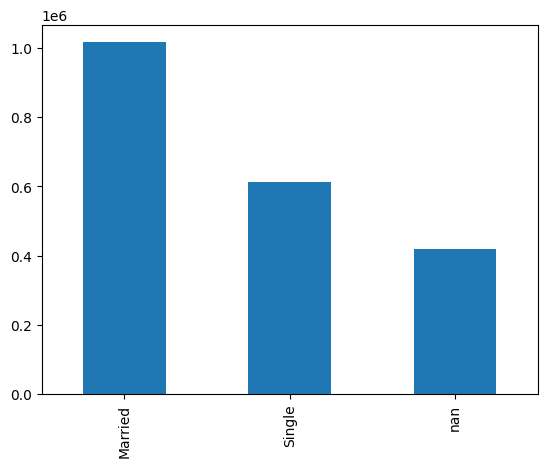

In [40]:
df['MARITAL_STATUS'].value_counts(dropna=False).plot(kind='bar')

In [41]:
df.corrwith(df['MARITAL_STATUS'].isnull())

/var/folders/51/kvxxh0pn2p9g4w8qy0z706n40000gn/T/ipykernel_72340/3067839141.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['MARITAL_STATUS'].isnull())


INDIVIDUAL_ID          0.003958
ADDRESS_ID             0.003605
CURR_ANN_AMT_CAR      -0.075115
CURR_ANN_AMT_HEALTH   -0.038149
CURR_ANN_AMT_HOUSE    -0.072495
INCOME                -0.044278
HAS_CHILDREN          -0.322825
LENGTH_OF_RESIDENCE   -0.271842
HOME_OWNER            -0.523379
COLLEGE_DEGREE        -0.214478
GOOD_CREDIT           -0.110804
dtype: float64

In [42]:
# Before applying one-hot encoding, handle NaN values
df['MARITAL_STATUS'] = df['MARITAL_STATUS'].fillna('Unknown')

# Apply one-hot encoding to the MARITAL_STATUS column
marital_status_dummies = pd.get_dummies(df['MARITAL_STATUS'], prefix='MARITAL_STATUS')

# concatenate the new columns (one-hot encoded)
df = pd.concat([df, marital_status_dummies], axis=1)

# drop the original 'MARITAL_STATUS'
df = df.drop('MARITAL_STATUS', axis=1)

The `MARITAL_STATUS` feature presents an interesting dimension in our dataset, accounting for the diversity in our customers' life stages. Initially, we faced the challenge of handling its missing values and integrating this categorical variable into our predictive models. To ensure we fully capture the nuances it may introduce, we've decided to retain `MARITAL_STATUS` during the exploratory phase of our analysis.

To effectively incorporate this feature into our machine learning models, we have applied one-hot encoding, which transforms `MARITAL_STATUS` into multiple binary columns, each representing a potential category. This technique allows us to:

- Represent 'Married' as a separate feature column where the presence of this marital status is indicated by `1`, and its absence by `0`.
- Similarly, 'Single' is denoted by `1` in its respective feature column when applicable.
- Address missing values by treating 'Unknown' as its own category, thereby preserving data integrity without imputing arbitrary values.

By employing one-hot encoding, we leverage the categorical nature of `MARITAL_STATUS` without assuming ordinality, and we ensure that our models can interpret this feature without bias towards any particular order or magnitude. This approach allows each category to contribute individually to the predictive power of our models, paving the way for insights into how marital status might correlate with customer value.


In [43]:
df.head()

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unknown
0,221300017872,521300005982,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.877997,517.999317,411,33750.0,2.0,15.0,50000 - 74999,1,1,1,N,1,0,0
1,221300134410,521300051115,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.199182,558.417779,414,41250.0,0.0,2.0,50000 - 74999,1,0,0,N,0,1,0
2,221300673028,521300247929,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.375112,701.649310,442,63750.0,0.0,10.0,75000 - 99999,1,0,0,N,1,0,0
3,221301573419,521300570147,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.409561,401.517490,463,187500.0,2.0,6.0,175000 - 199999,1,0,1,N,1,0,0
4,221301622347,521300588399,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.633494,772.857222,366,131250.0,1.0,4.0,225000 - 249999,1,1,1,Y,1,0,0


In [44]:
df['HOME_MARKET_VALUE'].value_counts(dropna=False)

75000 - 99999      354951
100000 - 124999    320300
50000 - 74999      259463
125000 - 149999    243269
NaN                184472
150000 - 174999    170959
175000 - 199999    113191
25000 - 49999      107464
200000 - 224999     78557
225000 - 249999     53686
250000 - 274999     36322
1000 - 24999        34541
300000 - 349999     24528
275000 - 299999     21949
350000 - 399999     13646
500000 - 749999     11943
400000 - 449999      7868
450000 - 499999      5822
750000 - 999999      3799
1000000 Plus         2483
Name: HOME_MARKET_VALUE, dtype: int64

<Axes: >

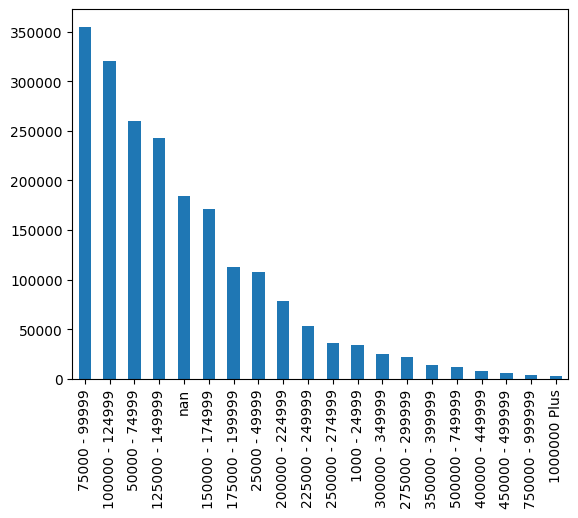

In [45]:
df['HOME_MARKET_VALUE'].unique()
df['HOME_MARKET_VALUE'].value_counts(dropna=False).plot(kind='bar')

In [46]:
#feature engineering of the HOME_MARKET_VALUE column

def convert_home_market_value_to_midpoint(value):
    if pd.isnull(value):
        return np.nan  
    elif value == '1000000 Plus':
        return 1000000  
    else:
        # Split the string on the dash and take the average of the low and high end
        low, high = value.split('-')
        return (int(low) + int(high)) / 2

# Apply the function to the HOME_MARKET_VALUE column
df['HOME_MARKET_VALUE_NUMERIC'] = df['HOME_MARKET_VALUE'].apply(convert_home_market_value_to_midpoint)


In [47]:
df.head()

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,...,LENGTH_OF_RESIDENCE,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unknown,HOME_MARKET_VALUE_NUMERIC
0,221300017872,521300005982,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.877997,517.999317,411,33750.0,...,15.0,50000 - 74999,1,1,1,N,1,0,0,62499.5
1,221300134410,521300051115,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.199182,558.417779,414,41250.0,...,2.0,50000 - 74999,1,0,0,N,0,1,0,62499.5
2,221300673028,521300247929,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.375112,701.649310,442,63750.0,...,10.0,75000 - 99999,1,0,0,N,1,0,0,87499.5
3,221301573419,521300570147,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.409561,401.517490,463,187500.0,...,6.0,175000 - 199999,1,0,1,N,1,0,0,187499.5
4,221301622347,521300588399,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.633494,772.857222,366,131250.0,...,4.0,225000 - 249999,1,1,1,Y,1,0,0,237499.5


In [48]:
df.corrwith(df['HOME_MARKET_VALUE_NUMERIC'].isnull())


/var/folders/51/kvxxh0pn2p9g4w8qy0z706n40000gn/T/ipykernel_72340/1483481887.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['HOME_MARKET_VALUE_NUMERIC'].isnull())


INDIVIDUAL_ID                0.011772
ADDRESS_ID                   0.012056
CURR_ANN_AMT_CAR            -0.079484
CURR_ANN_AMT_HEALTH         -0.040591
CURR_ANN_AMT_HOUSE          -0.076766
INCOME                      -0.039296
HAS_CHILDREN                -0.086397
LENGTH_OF_RESIDENCE         -0.396976
HOME_OWNER                  -0.454982
COLLEGE_DEGREE              -0.084614
GOOD_CREDIT                 -0.062917
MARITAL_STATUS_Married      -0.141396
MARITAL_STATUS_Single       -0.058888
MARITAL_STATUS_Unknown       0.242195
HOME_MARKET_VALUE_NUMERIC         NaN
dtype: float64

<Axes: >

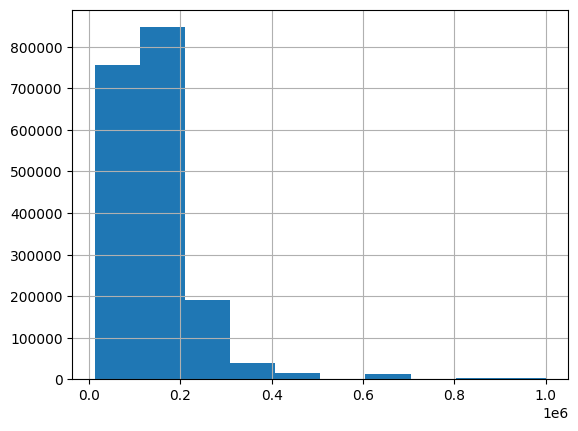

In [50]:
df['HOME_MARKET_VALUE_NUMERIC'].hist(bins=10)


In [51]:
df['HOME_MARKET_VALUE_NUMERIC'].isnull().mean()


0.09002090070675914

In [52]:
#remove null rows from the HOME_MARKET_VALUE_NUMERIC column
df = df.dropna(subset=['HOME_MARKET_VALUE_NUMERIC'])
df.isnull().mean()

INDIVIDUAL_ID                0.0
ADDRESS_ID                   0.0
CUST_ORIG_DATE               0.0
DATE_OF_BIRTH                0.0
SOCIAL_SECURITY_NUMBER       0.0
CUST_START_DATE              0.0
CURR_ANN_AMT_CAR             0.0
CURR_ANN_AMT_HEALTH          0.0
CURR_ANN_AMT_HOUSE           0.0
INCOME                       0.0
HAS_CHILDREN                 0.0
LENGTH_OF_RESIDENCE          0.0
HOME_MARKET_VALUE            0.0
HOME_OWNER                   0.0
COLLEGE_DEGREE               0.0
GOOD_CREDIT                  0.0
ADVANCED_STUDIES             0.0
MARITAL_STATUS_Married       0.0
MARITAL_STATUS_Single        0.0
MARITAL_STATUS_Unknown       0.0
HOME_MARKET_VALUE_NUMERIC    0.0
dtype: float64

Upon thorough examination of the `HOME_MARKET_VALUE_NUMERIC` variable, we have determined that the missing values do not exhibit significant correlations with other features in our dataset. This suggests that the impact of these missing values on our overall analysis may be minimal. Considering that the missing data accounts for approximately 10% of our dataset and in light of its low correlation with other variables, we have decided that the most prudent course of action is to remove these records from our dataset.

Justification for Data Removal:
- **Dataset Size**: Our dataset is sufficiently large, and the exclusion of these records will not compromise the statistical power of our subsequent analyses.
- **Bias Consideration**: Preliminary analysis suggests that the missingness is likely random (MCAR), reducing the risk of introducing bias through their removal.
- **Model Simplicity**: By removing the missing data, we maintain the simplicity of our modeling process, avoiding the uncertainties and potential biases associated with imputation.
- **Pattern of Missingness**: The lack of a strong relationship between the missing values and other features supports the assumption that the missingness is not systematic and is unlikely to be informative.

#### Correction of features format - CONSISTENCY & CORRECTNESS

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1864741 entries, 0 to 2133684
Data columns (total 21 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   INDIVIDUAL_ID              int64  
 1   ADDRESS_ID                 int64  
 2   CUST_ORIG_DATE             object 
 3   DATE_OF_BIRTH              object 
 4   SOCIAL_SECURITY_NUMBER     object 
 5   CUST_START_DATE            object 
 6   CURR_ANN_AMT_CAR           float64
 7   CURR_ANN_AMT_HEALTH        float64
 8   CURR_ANN_AMT_HOUSE         int64  
 9   INCOME                     float64
 10  HAS_CHILDREN               float64
 11  LENGTH_OF_RESIDENCE        float64
 12  HOME_MARKET_VALUE          object 
 13  HOME_OWNER                 int64  
 14  COLLEGE_DEGREE             int64  
 15  GOOD_CREDIT                int64  
 16  ADVANCED_STUDIES           object 
 17  MARITAL_STATUS_Married     uint8  
 18  MARITAL_STATUS_Single      uint8  
 19  MARITAL_STATUS_Unknown     uint8  
 20  HO

In [54]:
# Convert date columns to datetime
date_columns = ['CUST_ORIG_DATE', 'DATE_OF_BIRTH', 'CUST_START_DATE']
for date_column in date_columns:
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')


In [55]:
df['SOCIAL_SECURITY_NUMBER'] = df['SOCIAL_SECURITY_NUMBER'].astype(str)

In [56]:
df['HAS_CHILDREN'].value_counts(dropna=False)


0.0    1029078
1.0     783607
2.0      41844
3.0       6991
4.0       1940
5.0        668
6.0        613
Name: HAS_CHILDREN, dtype: int64

In [57]:
df['LENGTH_OF_RESIDENCE'].value_counts(dropna=False)

15.000    341017
6.801     199029
2.000     154995
3.000     142551
1.000     140596
4.000     126420
5.000     114428
6.000      95150
7.000      85704
8.000      75752
9.000      67906
0.000      61911
10.000     61548
11.000     59770
12.000     52357
13.000     45216
14.000     40391
Name: LENGTH_OF_RESIDENCE, dtype: int64

In [58]:
df['HOME_OWNER'].value_counts(dropna=False)

1    1424654
0     440087
Name: HOME_OWNER, dtype: int64

In [59]:
df['COLLEGE_DEGREE'].value_counts(dropna=False)

0    1279669
1     585072
Name: COLLEGE_DEGREE, dtype: int64

In [60]:
df['GOOD_CREDIT'].value_counts(dropna=False)

1    1542481
0     322260
Name: GOOD_CREDIT, dtype: int64

In [61]:
df['ADVANCED_STUDIES'].value_counts(dropna=False)

N    1376013
Y     488728
Name: ADVANCED_STUDIES, dtype: int64

In [62]:
#trnsform the categorical columns to binary
df['ADVANCED_STUDIES_BINARY'] = df['ADVANCED_STUDIES'].map({'Y': 1, 'N': 0})
df['ADVANCED_STUDIES_BINARY'].value_counts()

0    1376013
1     488728
Name: ADVANCED_STUDIES_BINARY, dtype: int64

In [63]:
df.dtypes

INDIVIDUAL_ID                         int64
ADDRESS_ID                            int64
CUST_ORIG_DATE               datetime64[ns]
DATE_OF_BIRTH                datetime64[ns]
SOCIAL_SECURITY_NUMBER               object
CUST_START_DATE              datetime64[ns]
CURR_ANN_AMT_CAR                    float64
CURR_ANN_AMT_HEALTH                 float64
CURR_ANN_AMT_HOUSE                    int64
INCOME                              float64
HAS_CHILDREN                        float64
LENGTH_OF_RESIDENCE                 float64
HOME_MARKET_VALUE                    object
HOME_OWNER                            int64
COLLEGE_DEGREE                        int64
GOOD_CREDIT                           int64
ADVANCED_STUDIES                     object
MARITAL_STATUS_Married                uint8
MARITAL_STATUS_Single                 uint8
MARITAL_STATUS_Unknown                uint8
HOME_MARKET_VALUE_NUMERIC           float64
ADVANCED_STUDIES_BINARY               int64
dtype: object